In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def categorized_col(df,car_th=20,num_th=10):
  cat_col = []
  num_col = []
  car_col = []
  for col in df.columns:
    if df[col].dtype in ["object","category","boolean"]:
      if df[col].nunique() < car_th:
        cat_col.append(col)
      else:
        car_col.append(col)
    else: #df[col].dtype in ["int","float"]:
      if df[col].nunique() < num_th:
        cat_col.append(col)
      else:
        num_col.append(col)

  print(f"rows: {df.shape[0]}")
  print(f"columns: {df.shape[1]}")
  print(f"categorical columns: {len(cat_col)}")
  print(f"numerical columns: {len(num_col)}")
  print(f"cardinal columns: {len(car_col)}\n")

  return cat_col,num_col,car_col

def info_col(df):
  cat_col,num_col,car_col = categorized_col(df)

  for col in df:
    if col in cat_col:
      print(f"{col}'s info:\n {df[col].value_counts()}\n")
    elif col in num_col:
      print(f"{col}'s info:\n {df[col].describe()}\n")
    else:
      print(f"{col} is a cardinal column.\n")

In [ ]:
def outlier_thresholds(data,col,q1=0.25,q3=0.75):
  q11 = data[col].quantile(q1)
  q33 = data[col].quantile(q3)

  iqr = q33-q11

  low = q11-1.5*iqr
  up = q33+iqr*1.5

  return low,up


def find_outliers(data,col,q1=0.25,q3=0.75):
  low,up = outlier_thresholds(data,col,q1,q3)

  if data[(data[col]<low)|(data[col]>up)].any(axis=None):
    return True
  else:
    return False

def replace_outliers(data,col,q1=0.25,q3=0.75):
  low,up = outlier_thresholds(data,col,q1,q3)
  data.loc[data[col]<low,col] = low
  data.loc[data[col]>up,col] = up

def remove_outliers(df,col):
  index = show_outliers(df,col,index=True)

  df_wo_outliers = df.drop(index,axis=0)

  return df_wo_outliers



In [ ]:
data = pd.read_csv("/content/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.loc[data['TotalCharges']==" ",'TotalCharges'] = np.NAN
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [ ]:
cat_col,num_col,car_col = categorized_col(data)
info_col(data)

rows: 7043
columns: 21
categorical columns: 17
numerical columns: 3
cardinal columns: 1

rows: 7043
columns: 21
categorical columns: 17
numerical columns: 3
cardinal columns: 1

customerID is a cardinal column.

gender's info:
 Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen's info:
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner's info:
 No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents's info:
 No     4933
Yes    2110
Name: Dependents, dtype: int64

tenure's info:
 count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

PhoneService's info:
 Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines's info:
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService's info:
 Fiber optic    3096
DSL            242

In [ ]:
num_col


['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
data['Churn'].nunique()

2

In [ ]:
data.loc[data['Churn'] == 'Yes','Churn'] = 1
data.loc[data['Churn'] == 'No','Churn'] = 0

In [ ]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
for col in cat_col:
  print(data.groupby(col)['Churn'].mean(),end="\n")

for col in num_col:
  if col != 'Churn':
    print(data.groupby('Churn')[col].mean(),end="\n")


gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64
SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64
Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64
Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64
PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64
MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64
OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64
OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn, dtype: float64
DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Churn

In [ ]:
outliers = []
for col in num_col:
  if check_outlier(data,col):
    outliers.append(str(col))
outliers
check_outlier(data,'TotalCharges')

False

In [ ]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

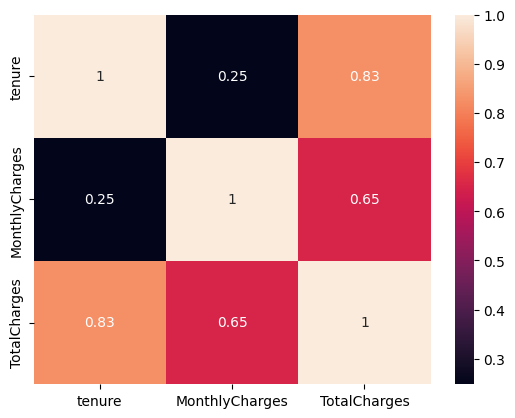

In [ ]:
import seaborn as sns

sns.heatmap(data[num_col].corr(),annot=True)
plt.show()

In [ ]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace=True)
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
False               0
dtype: int64

In [ ]:
data.loc[(data['Partner']=='Yes')|(data['Dependents']=='Yes'),"Crowd"] = 1
data.loc[(data['Partner']!='Yes')|(data['Dependents']!='Yes'),"Crowd"] = 0
data["Crowd"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7038    1.0
7039    1.0
7040    1.0
7041    0.0
7042    0.0
Name: Crowd, Length: 7043, dtype: float64

In [ ]:
data.loc[(data['TotalCharges']/data['tenure'] != data['MonthlyCharges']),"RaisedMC"] = 1
data.loc[(data['TotalCharges']/data['tenure'] == data['MonthlyCharges']),"RaisedMC"] = 0
data['RaisedMC'].value_counts()

1.0    6429
0.0     614
Name: RaisedMC, dtype: int64

In [ ]:
for col in ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PhoneService']:
  if col == 'InternetService':
    data.loc[data[col]!='No',"Service"] = 1
    data.loc[data[col]=='No',"Service"] = 0
  else:
    data.loc[data[col]=='Yes',"Service"] += 1

In [ ]:
data['Service'].value_counts()

1.0    1606
5.0    1062
4.0    1041
3.0     996
6.0     827
2.0     727
7.0     525
8.0     259
Name: Service, dtype: int64

In [ ]:
cat_col,num_col,car_col = categorized_col(data)
cat_col

rows: 7043
columns: 25
categorical columns: 21
numerical columns: 3
cardinal columns: 1



['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 False,
 'Crowd',
 'RaisedMC',
 'Service']

In [ ]:
cat_col.remove('Churn')

In [ ]:
data = pd.get_dummies(data,columns=cat_col,drop_first=True)
data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,PaymentMethod_Mailed check,Crowd_1.0,RaisedMC_1.0,Service_2.0,Service_3.0,Service_4.0,Service_5.0,Service_6.0,Service_7.0,Service_8.0
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
2,3668-QPYBK,2,53.85,108.15,1,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

for col in ["MonthlyCharges","TotalCharges","tenure"]:
  data[col] = MinMaxScaler().fit_transform(data[[col]])

data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,PaymentMethod_Mailed check,Crowd_1.0,RaisedMC_1.0,Service_2.0,Service_3.0,Service_4.0,Service_5.0,Service_6.0,Service_7.0,Service_8.0
0,7590-VHVEG,0.013889,0.115423,0.001275,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,0.472222,0.385075,0.215867,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
2,3668-QPYBK,0.027778,0.354229,0.010310,1,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
3,7795-CFOCW,0.625000,0.239303,0.210241,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,9237-HQITU,0.027778,0.521891,0.015330,1,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
data = data.drop('customerID',axis=1)

In [ ]:
x = data.drop("Churn",axis=1)
y = data["Churn"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate

In [ ]:
lr_model = LogisticRegression()
cv_lr = cross_validate(lr_model,x,y,cv=3,scoring=["accuracy", "f1", "roc_auc"],error_score='raise')

kn_model = KNeighborsClassifier()
cv_kn = cross_validate(kn_model,x,y,cv=3,scoring=["accuracy", "f1", "roc_auc"])

dt_model = DecisionTreeClassifier()
cv_dt = cross_validate(dt_model,x,y,cv=3,scoring=["accuracy", "f1", "roc_auc"])

rf_model = RandomForestClassifier()
cv_rf = cross_validate(rf_model,x,y,cv=3,scoring=["accuracy", "f1", "roc_auc"])

gb_model = GradientBoostingClassifier()
cv_gb = cross_validate(gb_model,x,y,cv=3,scoring=["accuracy", "f1", "roc_auc"])

xgb_model = XGBClassifier()
cv_xgb = cross_validate(xgb_model,x,y,cv=3,scoring=["accuracy", "f1", "roc_auc"])

lgbm_model = LGBMClassifier()
cv_lgbm = cross_validate(lgbm_model,x,y,cv=5,scoring=["accuracy", "f1", "roc_auc"])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

In [ ]:
print(cv_lr['test_accuracy'].mean())
print(cv_kn['test_accuracy'].mean())
print(cv_dt['test_accuracy'].mean())
print(cv_rf['test_accuracy'].mean())
print(cv_gb['test_accuracy'].mean())
print(cv_xgb['test_accuracy'].mean())
print(cv_lgbm['test_accuracy'].mean())

0.8042031498642533
0.7677125727698099
0.7292342466260529
0.7942645255932218
0.802782534132643
0.7846095284688102
0.795117326117814


In [ ]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
dt_params= {"max_depth": [None,5,8], "min_samples_split": [2,6,10], "max_features": [None,3,5,7]}

In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_params = {"max_depth":[5,8,None], "min_samples_split": [2,6,10], "n_estimators": [100,200,300]}

In [ ]:
gb_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gb_params = {'learning_rate': [0.1,0.05,0.01], "max_depth":[3,5,8], "n_estimators": [100,200,300]}

In [ ]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
lgbm_params = {"learning_rate": [0.1,0.01], "n_estimators": [100,200,300],"max_depth": [3,5,7]}

In [ ]:
dt_gmodel = GridSearchCV(dt_model,dt_params,cv=5, n_jobs=-1, verbose=True).fit(x,y)

dt_final = dt_model.set_params(**dt_gmodel.best_params_).fit(x,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
rf_gmodel = GridSearchCV(rf_model,rf_params,cv=5, n_jobs=-1, verbose=True).fit(x,y)

rf_final = rf_model.set_params(**rf_gmodel.best_params_).fit(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
gb_gmodel = GridSearchCV(gb_model,gb_params,cv=5, n_jobs=-1, verbose=True).fit(x,y)

gb_final = gb_model.set_params(**gb_gmodel.best_params_).fit(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
lgbm_gmodel = GridSearchCV(lgbm_model,lgbm_params,cv=5,n_jobs=-1, verbose=True).fit(x,y)

lgbm_final = lgbm_model.set_params(**lgbm_gmodel.best_params_).fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 7043, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265370 -> initscore=-1.018243
[LightGBM] [Info] Start training from score -1.018243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
cv_dt = cross_validate(dt_final,x,y,cv=3,scoring=["accuracy", "f1", "roc_auc"])
cv_rf = cross_validate(rf_final,x,y,cv=3,scoring=["accuracy", "f1", "roc_auc"])
cv_gb = cross_validate(gb_final,x,y,cv=3,scoring=["accuracy", "f1", "roc_auc"])
cv_lgbm = cross_validate(lgbm_final,x,y,cv=3,scoring=["accuracy", "f1", "roc_auc"])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1246, number of negative: 3449
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 4695, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265389 -> initscore=-1.018146
[LightGBM] [Info] Start training from score -1.018146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
print("DT")
print(cv_dt['test_accuracy'].mean())
print(cv_dt['test_f1'].mean())
print(cv_dt['test_roc_auc'].mean())

print("RF")
print(cv_rf['test_accuracy'].mean())
print(cv_rf['test_f1'].mean())
print(cv_rf['test_roc_auc'].mean())

print("GBM")
print(cv_gb['test_accuracy'].mean())
print(cv_gb['test_f1'].mean())
print(cv_gb['test_roc_auc'].mean())

print("LGBM")
print(cv_lgbm['test_accuracy'].mean())
print(cv_lgbm['test_f1'].mean())
print(cv_lgbm['test_roc_auc'].mean())



DT
0.7782224435268047
0.5357330314537779
0.7988590272556907
RF
0.8015050324613658
0.5634382033196571
0.8444034774555758
GBM
0.8029243174620687
0.5821740550617034
0.8457713266466952
LGBM
0.8040606406816053
0.5841303442993696
0.84535504061004


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def feature_imp(model,data):
  feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': data.columns})
  plt.figure(figsize=(10, 10))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False))
  plt.show()

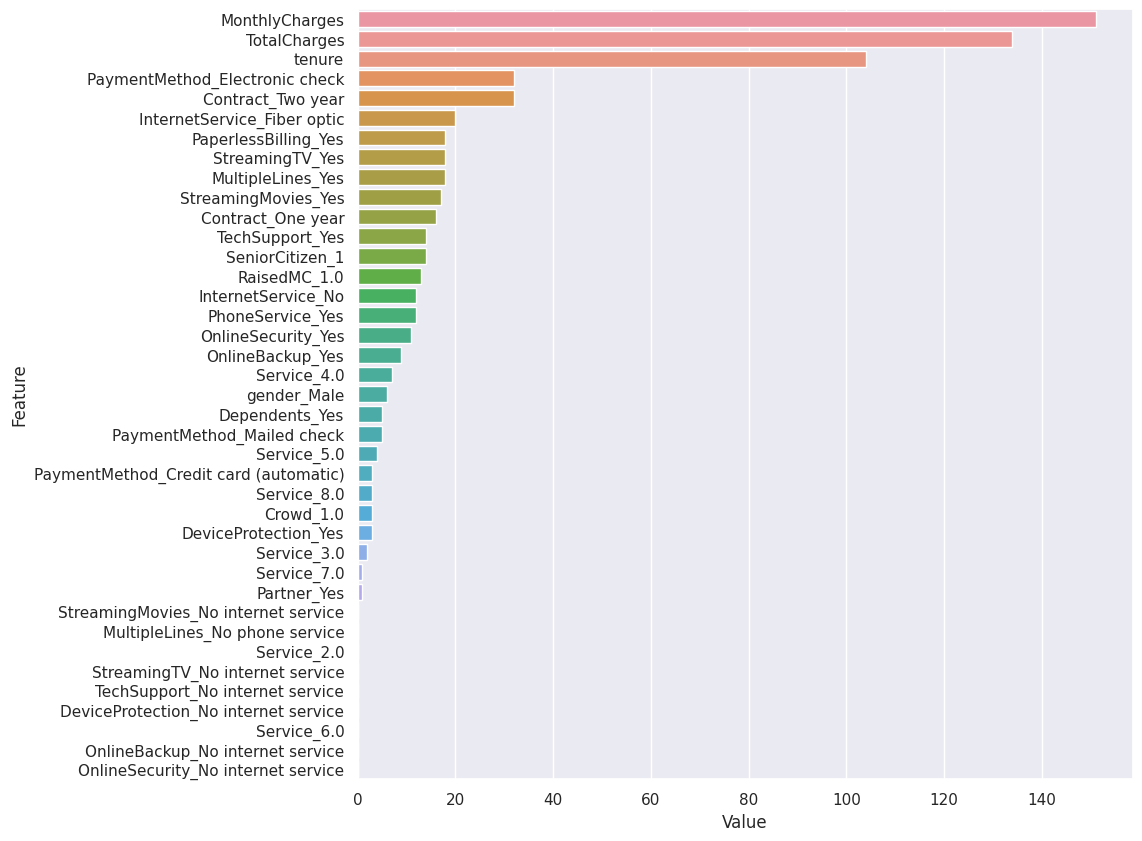

In [ ]:
feature_imp(lgbm_final,x)